In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [101]:
df = pd.read_csv('DataCleaningOutput.csv')

In [102]:
df.head()

,Unnamed: 0,DOT Case Number,Law Enforcement Case Number,Crash Date & Time,District,County,City,Crash Month,Crash Day,Crash Time,...,Fatalities,Injuries,Major Injuries,Minor Injuries,Possible Injuries,Unknown Injuries,Property Damage,Report Type,Rest Update,Crash Location
0,0,2011636263,11-1528,06/28/2011 11:38:00 AM,1,POLK,URBANDALE,June,Tuesday,11:38,...,0,0,0,0,0,0,6500,TraCS,08/14/2018 04:42:27 PM,POINT (-93.73654589797147 41.62922672395549)
1,1,2011643409,201101827,07/03/2011 09:43:00 PM,1,BOONE,NaN,July,Sunday,21:43,...,0,0,0,0,0,0,2000,TraCS,08/14/2018 04:42:27 PM,POINT (-93.87429624122426 42.18527185276003)
2,2,2011641023,11-0088,02/08/2011 07:00:00 PM,1,WEBSTER,NaN,February,Tuesday,19:00,...,0,0,0,0,0,0,2000,TraCS,08/14/2018 04:42:27 PM,POINT (-94.12854269059548 42.46583138486093)
3,3,2012684967,NaN,05/04/2012 11:51:00 AM,6,JOHNSON,IOWA CITY,May,Friday,11:51,...,0,0,0,0,0,0,2599,Officer,08/14/2018 04:42:27 PM,POINT (-91.53210057297697 41.64546030234435)
4,4,2011642449,NaN,07/27/2011 06:10:00 AM,1,POLK,DES MOINES,July,Wednesday,06:10,...,0,0,0,0,0,0,3100,Officer,08/14/2018 04:42:27 PM,POINT (-93.62744704200334 41.586315087439765)


In [103]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [104]:
df.columns

Index(['DOT Case Number', 'Law Enforcement Case Number', 'Crash Date & Time',
       'District', 'County', 'City', 'Crash Month', 'Crash Day', 'Crash Time',
       'Major Cause', 'Crash Manner', 'Crash Severity', 'Surface Conditions',
       'Drug/Alcohol Related', 'Environment', 'Roadway', 'Light Conditions',
       'Weather Conditions', 'Work Zone', 'Paved Road', 'Roadway Junction',
       'First Harmful Event', 'Harmful Event Location', 'Literal Description',
       'Vehicles', 'Occupants', 'Fatalities', 'Injuries', 'Major Injuries',
       'Minor Injuries', 'Possible Injuries', 'Unknown Injuries',
       'Property Damage', 'Report Type', 'Rest Update', 'Crash Location'],
      dtype='object')

In [105]:
df['Crash Severity'].value_counts()

Property Damage Only    402560
Possible/Unknown         88173
Minor Injury             49861
Major Injury             13270
Fatal                     3321
Name: Crash Severity, dtype: int64

In [106]:
df_no_injuries = df.loc[(df["Injuries"] == 0)]
df_injuries = df.loc[(df["Injuries"] > 0)]
df_fatalities = df.loc[(df['Fatalities']> 0)]

In [115]:
df_injury_or_fatality = df.loc[(df["Injuries"] > 0) | (df["Fatalities"] > 0)]

In [136]:
df_injury_or_fatality.shape

(154625, 36)

In [127]:
_df_injury_or_fatality = (df["Injuries"] > 0) | (df["Fatalities"] > 0)

In [128]:
no_injury_or_fatality = df.loc[~_df_injury_or_fatality]

In [129]:
no_injury_or_fatality.shape

(402560, 36)

In [131]:
df_injury_or_fatality['Major Cause'].nunique()

71

In [132]:
no_injury_or_fatality['Major Cause'].nunique()

71

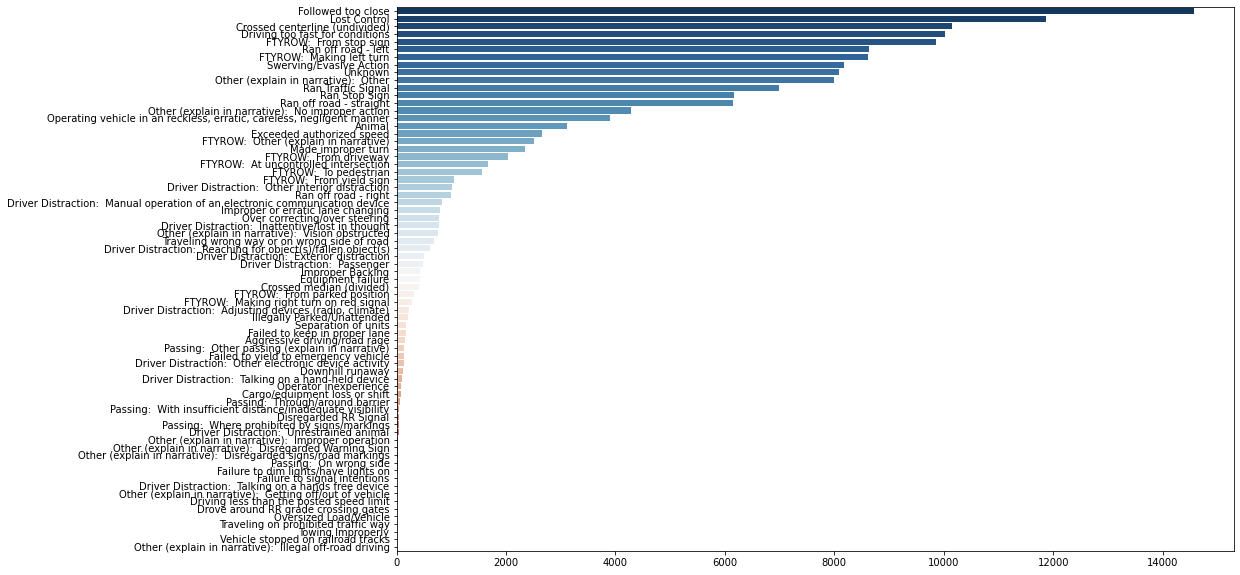

In [134]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df_injury_or_fatality['Major Cause'].value_counts())
names = list(x.index)
values = list(x['Major Cause'])
sns.barplot(x=values, y=names, palette="RdBu_r")

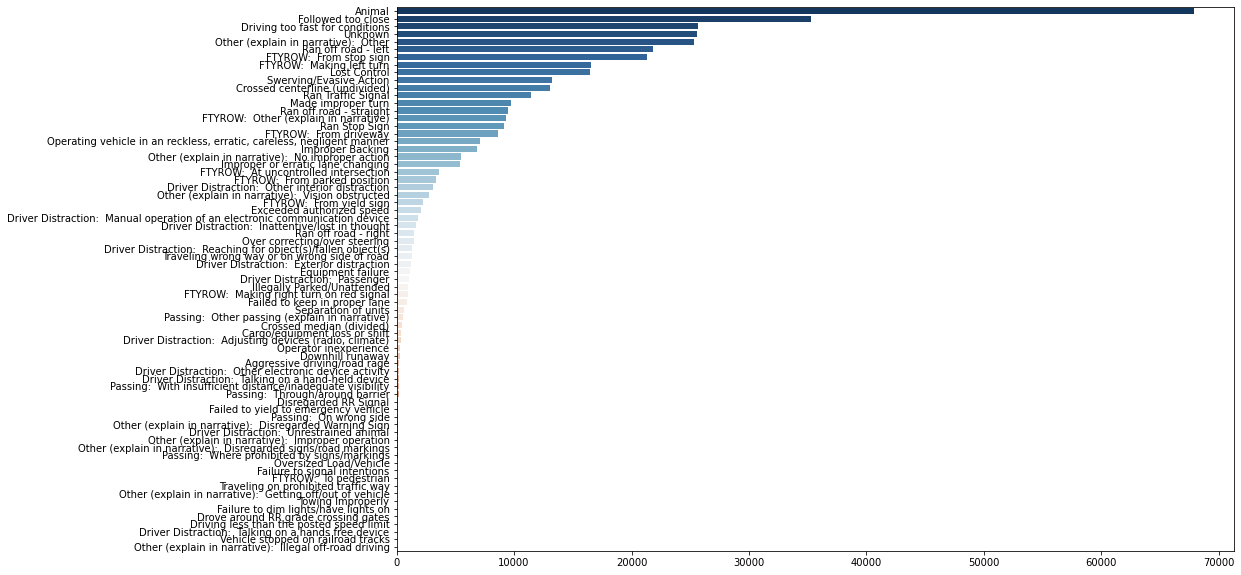

In [135]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(no_injury_or_fatality['Major Cause'].value_counts())
names = list(x.index)
values = list(x['Major Cause'])
sns.barplot(x=values, y=names, palette="RdBu_r")

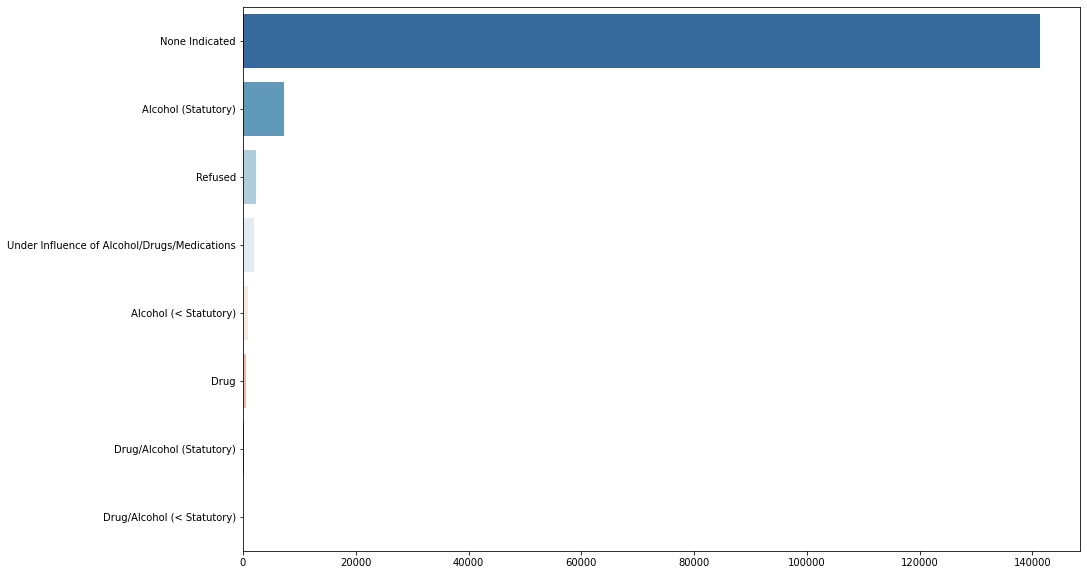

In [138]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df_injury_or_fatality['Drug/Alcohol Related'].value_counts())
names = list(x.index)
values = list(x['Drug/Alcohol Related'])
sns.barplot(x=values, y=names, palette="RdBu_r")

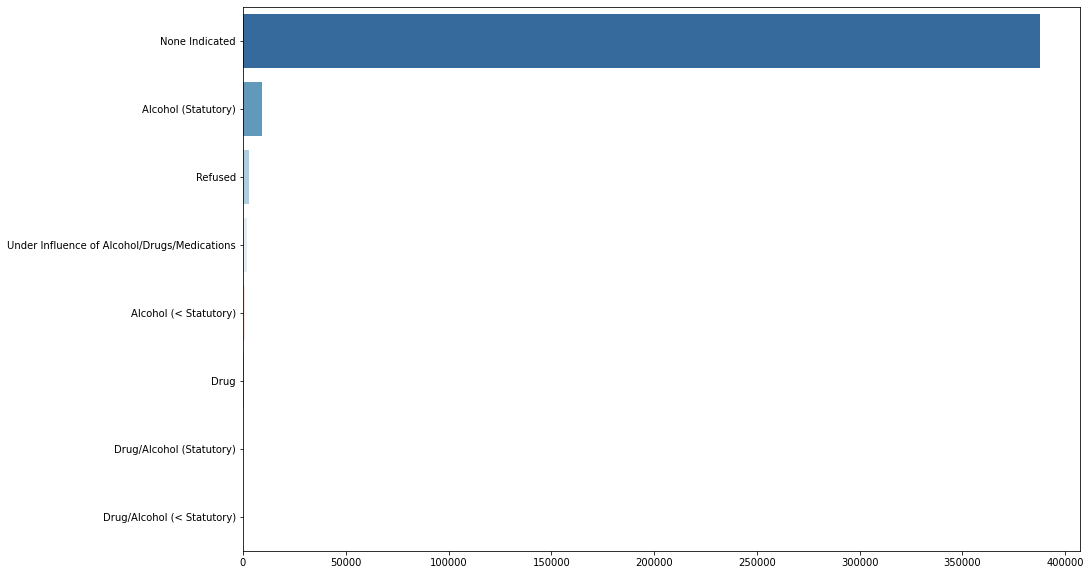

In [139]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(no_injury_or_fatality['Drug/Alcohol Related'].value_counts())
names = list(x.index)
values = list(x['Drug/Alcohol Related'])
sns.barplot(x=values, y=names, palette="RdBu_r")

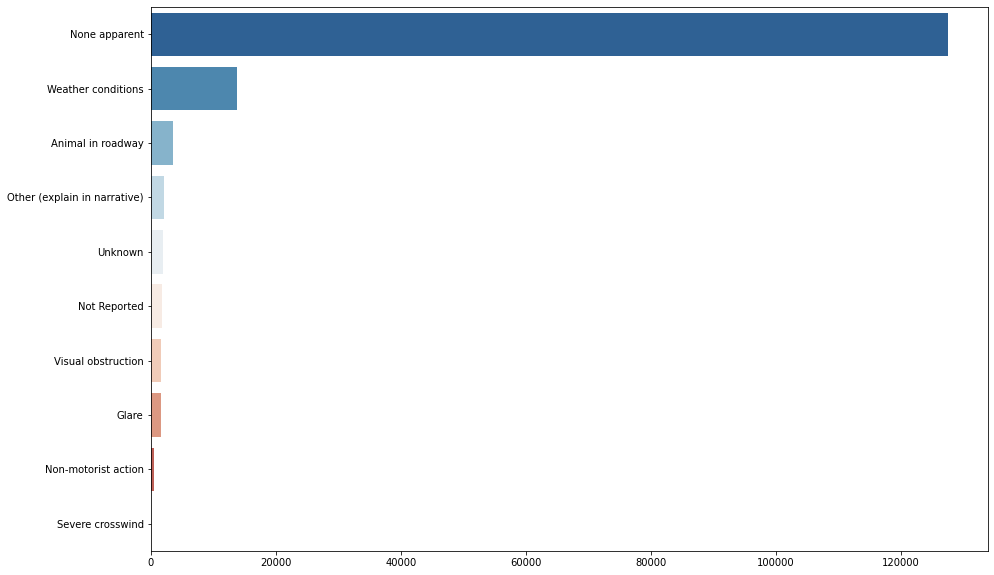

In [148]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df_injury_or_fatality['Environment'].value_counts())
names = list(x.index)
values = list(x['Environment'])
sns.barplot(x=values, y=names, palette="RdBu_r")

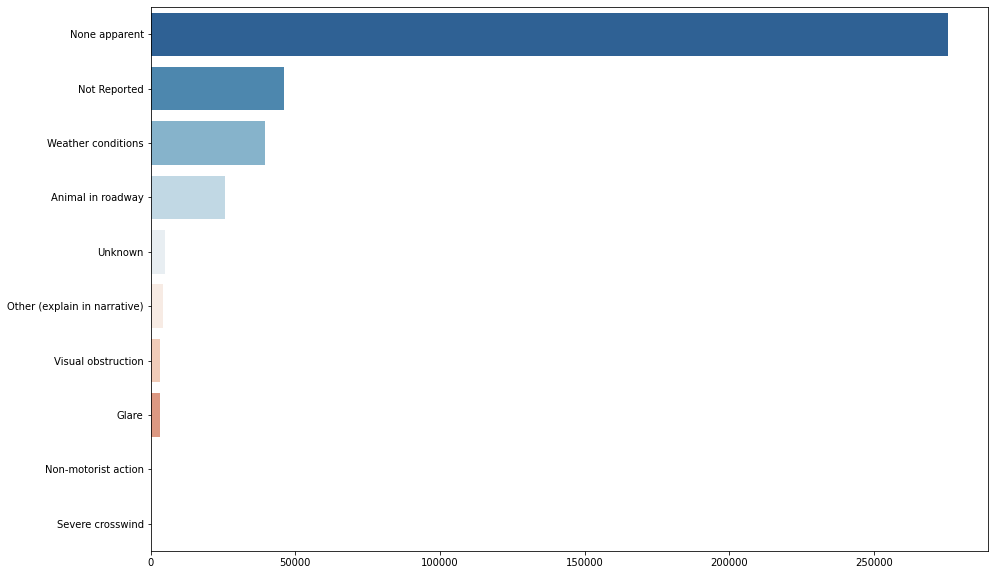

In [149]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(no_injury_or_fatality['Environment'].value_counts())
names = list(x.index)
values = list(x['Environment'])
sns.barplot(x=values, y=names, palette="RdBu_r")

In [143]:
df_injury_or_fatality['First Harmful Event'].unique()

array(['Non-collision events:  Overturn/rollover',
       'Collision with:  Vehicle in traffic',
       'Non-collision events:  Other non-collision (explain in narrative)',
       'Collision with:  Parked motor vehicle',
       'Collision with:  Non-motorist (see non-motorist section - NOT a unit)',
       'Collision with fixed object:  Tree',
       'Collision with fixed object:  Curb/island/raised median',
       'Collision with fixed object:  Ditch',
       'Collision with:  Other non-fixed object (explain in narrative)',
       'Collision with fixed object:  Guardrail - face',
       'Collision with fixed object:  Culvert/pipe opening',
       'Collision with:  Animal',
       'Collision with fixed object:  Other fixed object (explain in narrative)',
       'Collision with fixed object:  Utility pole/light support',
       'Collision with fixed object:  Bridge overhead structure',
       'Collision with fixed object:  Impact attenuator/crash cushion',
       'Collision with fixed o

In [144]:
no_injury_or_fatality['First Harmful Event'].unique()

array(['Collision with:  Vehicle in traffic', 'Collision with:  Animal',
       'Collision with fixed object:  Ditch',
       'Collision with:  Parked motor vehicle',
       'Collision with fixed object:  Utility pole/light support',
       'Non-collision events:  Other non-collision (explain in narrative)',
       'Non-collision events:  Overturn/rollover',
       'Collision with fixed object:  Other fixed object (explain in narrative)',
       'Collision with:  Other non-fixed object (explain in narrative)',
       'Collision with fixed object:  Guardrail - face',
       'Collision with fixed object:  Curb/island/raised median',
       'Collision with fixed object:  Tree', 'Not Reported',
       'Collision with fixed object:  Bridge overhead structure',
       'Collision with fixed object:  Traffic sign support',
       'Miscellaneous events:  Hit and run',
       'Collision with fixed object:  Mailbox', 'Unknown',
       'Miscellaneous events:  Fire/explosion',
       'Collision wit

### CRASH SEVERITY 

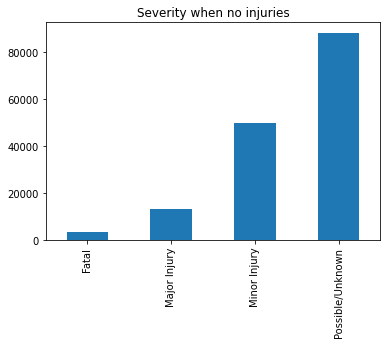

In [145]:
df_injury_or_fatality['Crash Severity'].value_counts().sort_index().plot(kind='bar',title='Severity when no injuries')

In [146]:
df_injury_or_fatality['Crash Severity'].value_counts()

Possible/Unknown    88173
Minor Injury        49861
Major Injury        13270
Fatal                3321
Name: Crash Severity, dtype: int64

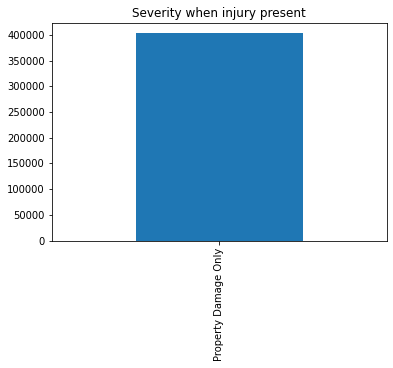

In [147]:
no_injury_or_fatality['Crash Severity'].value_counts().sort_index().plot(kind='bar',title='Severity when injury present')

### END

In [114]:
df_injury_or_fatality.head()

,DOT Case Number,Law Enforcement Case Number,Crash Date & Time,District,County,City,Crash Month,Crash Day,Crash Time,Major Cause,...,Fatalities,Injuries,Major Injuries,Minor Injuries,Possible Injuries,Unknown Injuries,Property Damage,Report Type,Rest Update,Crash Location
81,2012685988,2012025607,05/06/2012 03:36:00 AM,1,POLK,DES MOINES,May,Sunday,03:36,Ran off road - left,...,1,0,0,0,0,0,30000,TraCS,08/14/2018 04:42:27 PM,POINT (-93.57570084035932 41.64412395267107)
160,2011636654,11-4622,07/03/2011 04:41:00 AM,1,POLK,DES MOINES,July,Sunday,04:41,Crossed centerline (undivided),...,1,1,1,0,0,0,13000,TraCS,08/14/2018 04:42:27 PM,POINT (-93.5060205857855 41.615223431251124)
269,2012699103,NaN,06/14/2012 02:46:00 PM,5,WARREN,NaN,June,Thursday,14:46,FTYROW: From stop sign,...,1,1,0,0,1,0,6500,Officer,08/14/2018 04:42:27 PM,POINT (-93.50546893730902 41.20468869973345)
314,2012685866,12010206,05/16/2012 03:01:00 PM,6,LINN,MARION,May,Wednesday,15:01,Crossed centerline (undivided),...,1,1,0,1,0,0,12500,TraCS,08/14/2018 04:42:27 PM,POINT (-91.60536345027619 42.03907020684345)
513,2011639508,11-009154,07/25/2011 08:47:00 AM,1,TAMA,NaN,July,Monday,08:47,Crossed centerline (undivided),...,1,0,0,0,0,0,15000,TraCS,08/14/2018 04:42:27 PM,POINT (-92.59143504387383 42.17413225847705)


In [122]:
df_injury_or_fatality.columns

Index(['DOT Case Number', 'Law Enforcement Case Number', 'Crash Date & Time',
       'District', 'County', 'City', 'Crash Month', 'Crash Day', 'Crash Time',
       'Major Cause', 'Crash Manner', 'Crash Severity', 'Surface Conditions',
       'Drug/Alcohol Related', 'Environment', 'Roadway', 'Light Conditions',
       'Weather Conditions', 'Work Zone', 'Paved Road', 'Roadway Junction',
       'First Harmful Event', 'Harmful Event Location', 'Literal Description',
       'Vehicles', 'Occupants', 'Fatalities', 'Injuries', 'Major Injuries',
       'Minor Injuries', 'Possible Injuries', 'Unknown Injuries',
       'Property Damage', 'Report Type', 'Rest Update', 'Crash Location'],
      dtype='object')

In [125]:
df_injury_or_fatality['Roadway']=='None apparent'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [83]:
print(df_fatalities['Major Cause'].count())
print(df_fatalities['Major Cause'].nunique())
print(df_fatalities['Major Cause'].unique())

3321
56
['Ran off road - left' 'Crossed centerline (undivided)'
 'FTYROW:  From stop sign' 'Lost Control'
 'FTYROW:  Other (explain in narrative)'
 'FTYROW:  At uncontrolled intersection' 'Swerving/Evasive Action'
 'Exceeded authorized speed' 'Separation of units'
 'FTYROW:  From yield sign' 'Ran Stop Sign' 'FTYROW:  Making left turn'
 'Unknown' 'Ran off road - right' 'Equipment failure'
 'Other (explain in narrative):  Other' 'Ran off road - straight' 'Animal'
 'Other (explain in narrative):  No improper action'
 'FTYROW:  From driveway' 'Traveling wrong way or on wrong side of road'
 'Operating vehicle in an reckless, erratic, careless, negligent manner'
 'Driving too fast for conditions' 'FTYROW:  To pedestrian'
 'Over correcting/over steering' 'Illegally Parked/Unattended'
 'Ran Traffic Signal'
 'Driver Distraction:  Manual operation of an electronic communication device'
 'Cargo/equipment loss or shift' 'Made improper turn'
 'Crossed median (divided)' 'Followed too close'
 'Driver

In [27]:
new = pd.DataFrame(df.select_dtypes(include=[np.int64]))

In [28]:
new = new.apply(pd.to_numeric, errors='coerce', downcast = 'float')

In [29]:
new.head()

,Unnamed: 0,DOT Case Number,District,Work Zone,Vehicles,Occupants,Fatalities,Injuries,Major Injuries,Minor Injuries,Possible Injuries,Unknown Injuries,Property Damage
0,0.0,2.011636e+09,1.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,6500.0
1,1.0,2.011643e+09,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0
2,2.0,2.011641e+09,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0
3,3.0,2.012685e+09,6.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2599.0
4,4.0,2.011642e+09,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3100.0


In [30]:
new.dtypes

Unnamed: 0           float32
DOT Case Number      float32
District             float32
Work Zone            float32
Vehicles             float32
Occupants            float32
Fatalities           float32
Injuries             float32
Major Injuries       float32
Minor Injuries       float32
Possible Injuries    float32
Unknown Injuries     float32
Property Damage      float32
dtype: object

In [35]:
y = new['Property Damage'].values
X = new.drop('Property Damage', axis=1).values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [37]:
u = LinearRegression()

u.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = u.predict(X_test)

# Assign y_pred the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

In [41]:
u.score(y_test, y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[5000. 3000. 5000. ... 5200. 6300. 1000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

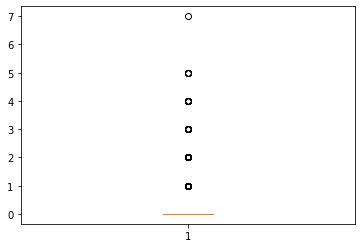

In [97]:
#boxplot of the number of fatalities
plt.boxplot(df['Fatalities'])
plt.show()

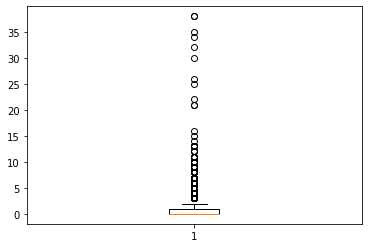

In [75]:
plt.boxplot(df['Injuries'])
plt.show()

In [78]:
df['Crash Severity'].value_counts()
#need to rank these 1-5 for Severity

Property Damage Only    402560
Possible/Unknown         88173
Minor Injury             49861
Major Injury             13270
Fatal                     3321
Name: Crash Severity, dtype: int64

In [45]:
##df['Weather Conditions'].hist()

In [46]:
##df['Crash Day'].hist()

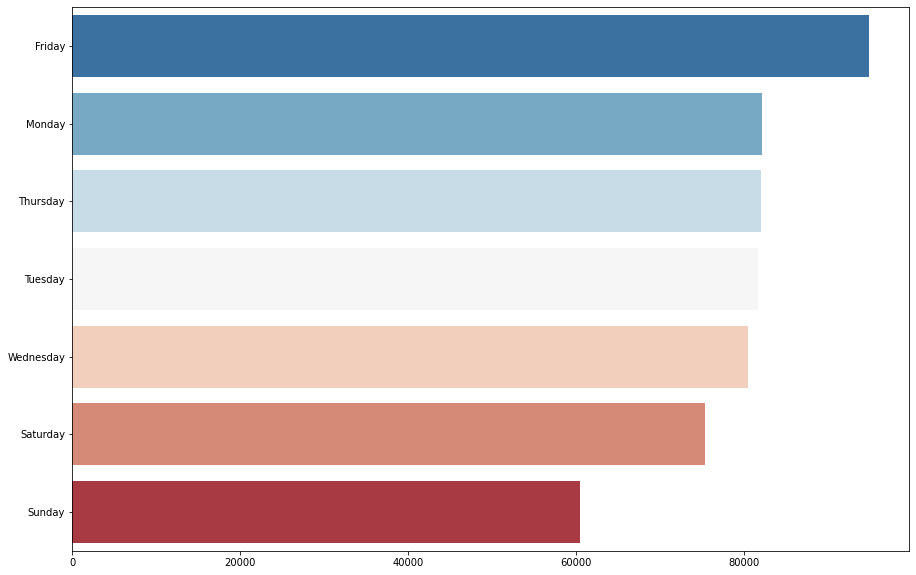

In [79]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Crash Day'].value_counts())
names = list(x.index)
values = list(x['Crash Day'])
sns.barplot(x=values, y=names, palette="RdBu_r")

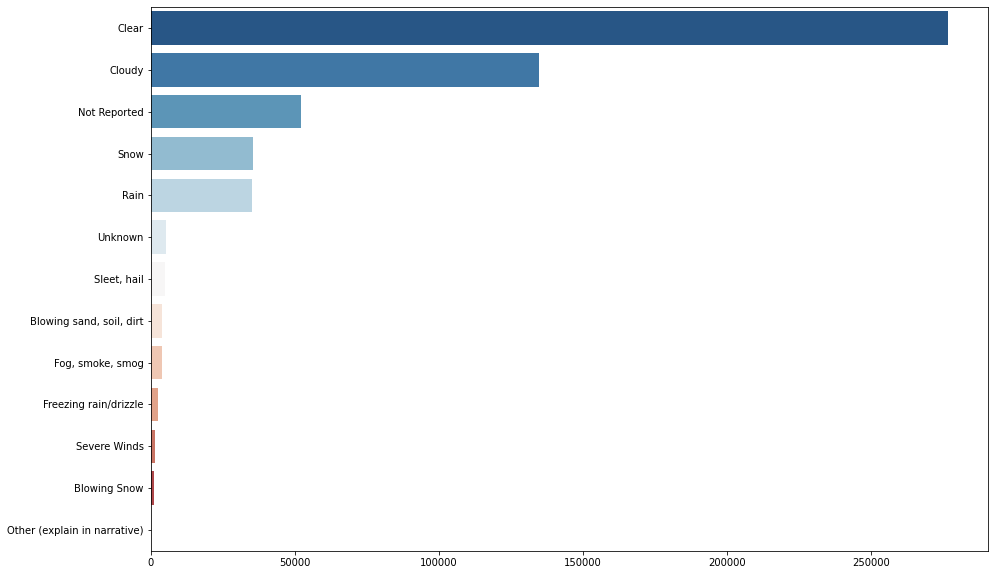

In [80]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Weather Conditions'].value_counts())
names = list(x.index)
values = list(x['Weather Conditions'])
sns.barplot(x=values, y=names, palette="RdBu_r")

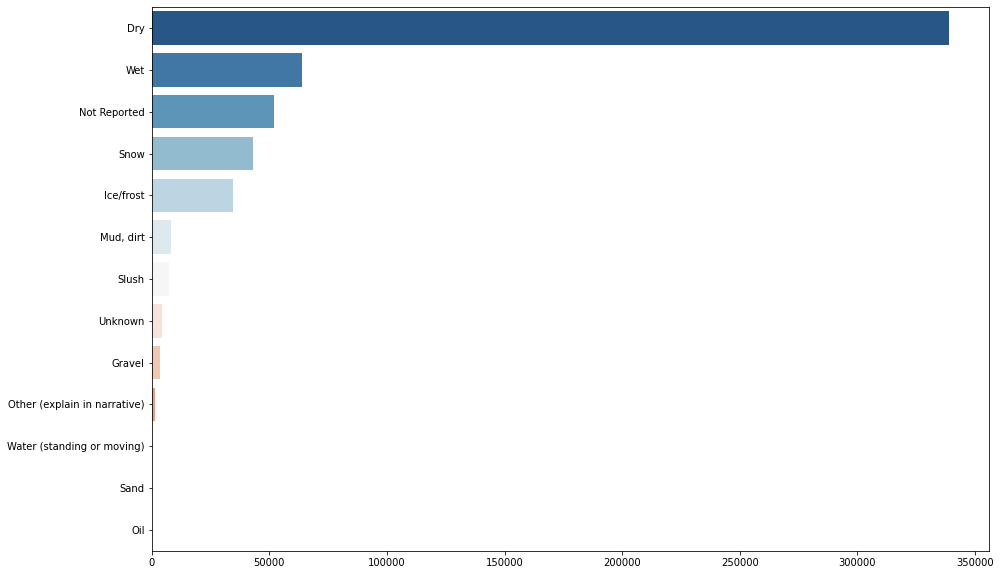

In [81]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Surface Conditions'].value_counts())
names = list(x.index)
values = list(x['Surface Conditions'])
sns.barplot(x=values, y=names, palette="RdBu_r")

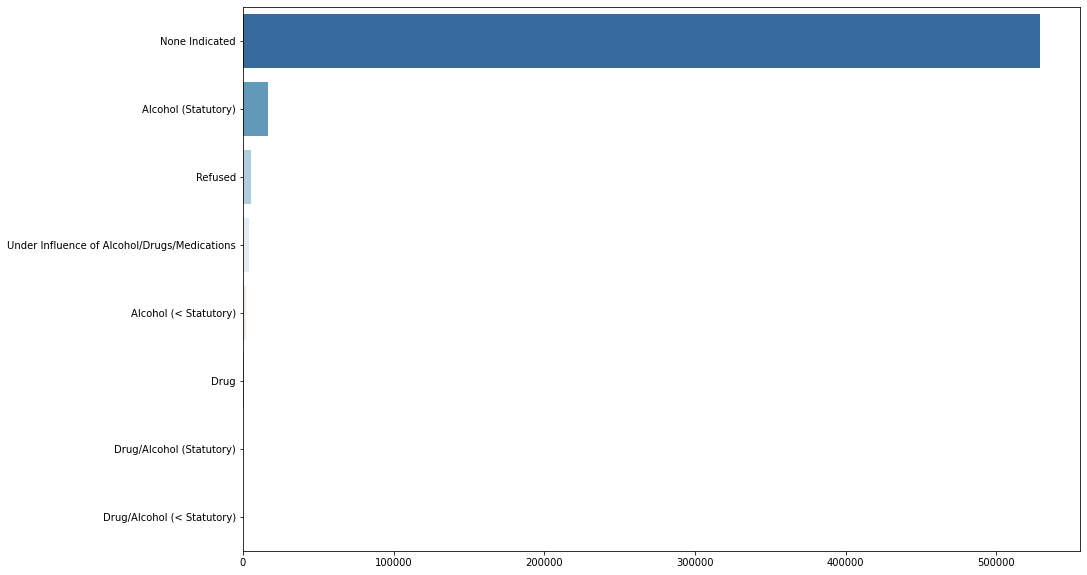

In [82]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Drug/Alcohol Related'].value_counts())
names = list(x.index)
values = list(x['Drug/Alcohol Related'])
sns.barplot(x=values, y=names, palette="RdBu_r")

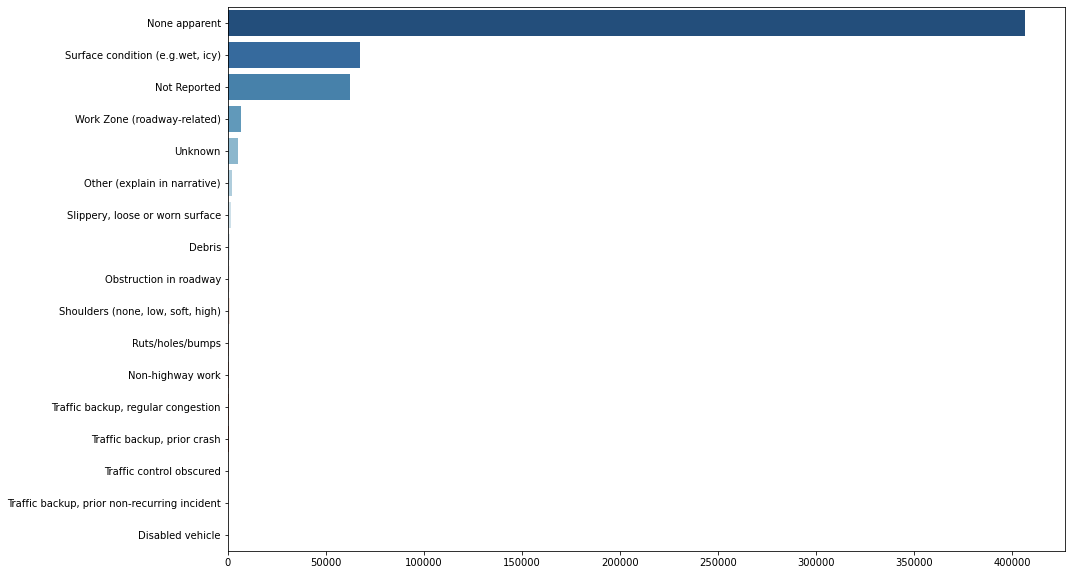

In [83]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Roadway'].value_counts())
names = list(x.index)
values = list(x['Roadway'])
sns.barplot(x=values, y=names, palette="RdBu_r")

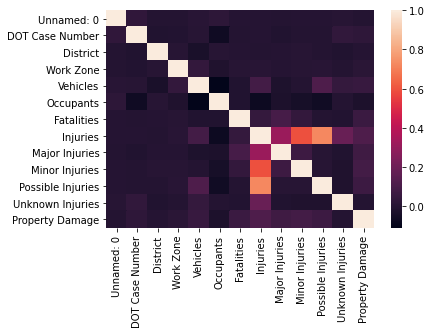

In [84]:
corr = df.corr()
sns.heatmap(corr)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557185 entries, 0 to 557184
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Unnamed: 0                   557185 non-null  int64 
 1   DOT Case Number              557185 non-null  int64 
 2   Law Enforcement Case Number  502994 non-null  object
 3   Crash Date & Time            557185 non-null  object
 4   District                     557185 non-null  int64 
 5   County                       557185 non-null  object
 6   City                         401405 non-null  object
 7   Crash Month                  557185 non-null  object
 8   Crash Day                    557185 non-null  object
 9   Crash Time                   557185 non-null  object
 10  Major Cause                  557185 non-null  object
 11  Crash Manner                 557185 non-null  object
 12  Crash Severity               557185 non-null  object
 13  Surface Condit

In [ ]:
plt.pie(df['District'],autopct='%1.1f%%')
plt.title('My Title')
plt.axis('equal')
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['District'].value_counts())
names = list(x.index)
values = list(x['District'])
sns.barplot(x=names, y=values, palette="RdBu_r")

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Crash Month'].value_counts())
names = list(x.index)
values = list(x['Crash Month'])
sns.barplot(x=names, y=values, palette="RdBu_r")

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['County'].value_counts())
names = list(x.index)
values = list(x['County'])
sns.barplot(x=names, y=values, palette="RdBu_r")

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Crash Severity'].value_counts())
names = list(x.index)
values = list(x['Crash Severity'])
sns.barplot(x=values, y=names, palette="RdBu_r")

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Drug/Alcohol Related'].value_counts())
names = list(x.index)
values = list(x['Drug/Alcohol Related'])
sns.barplot(x=values, y=names, palette="RdBu_r")

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Crash Manner'].value_counts())
names = list(x.index)
values = list(x['Crash Manner'])
sns.barplot(x=values, y=names, palette="RdBu_r")

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Major Cause'].value_counts())
names = list(x.index)
values = list(x['Major Cause'])
sns.barplot(x=values, y=names, palette="RdBu_r")

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Environment'].value_counts())
names = list(x.index)
values = list(x['Environment'])
sns.barplot(x=values, y=names, palette="RdBu_r")

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Roadway'].value_counts())
names = list(x.index)
values = list(x['Roadway'])
sns.barplot(x=values, y=names, palette="RdBu_r")

In [ ]:
f, ax = plt.subplots(figsize=(15,10))
x = pd.DataFrame(df['Surface Conditions'].value_counts())
names = list(x.index)
values = list(x['Surface Conditions'])
sns.barplot(x=values, y=names, palette="RdBu_r")

In [ ]:
df['Fatalities'].boxplot()

In [131]:
from sklearn import decomposition

In [132]:
pca = decomposition.PCA()

In [ ]:
pca.n_components = 2
pca_data = pca.fit_transform